# Topics

- Render image
- Render image with sight distance
- Render observation
- Play loop in human mode vs training mode, with either simple of image observations

## Render images

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

from environments.model_ready_boids import RavenChasingBoids

In [48]:
env = RavenChasingBoids(20, render_mode="rgb_array", observation_type="visual")

In [34]:
image = env.render()

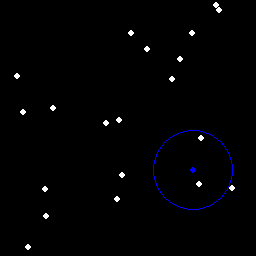

In [35]:
Image.fromarray(image)

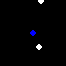

In [43]:
Image.fromarray(env.get_visual_observation())

In [49]:
from stable_baselines3.common.env_checker import check_env
check_env(env)

0 steps taken. Average steps per episode: nan
0 steps taken. Average steps per episode: nan
1 steps taken. Average steps per episode: nan


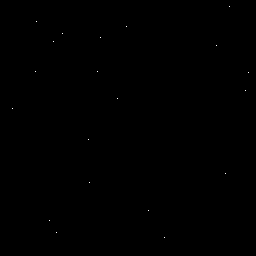

In [18]:
import numpy as np
from PIL import Image

def create_image(data):
    # Initialize a 256x256 array with zeros
    image_array = np.zeros((256, 256), dtype=np.uint8)

    # Process each agent in the data
    for agent in data:
        x, y = agent.position
        # Round the positions to nearest integer and ensure they are within the 256x256 grid
        x = min(max(int(round(x)), 0), 255)
        y = min(max(int(round(y)), 0), 255)
        
        # Set the pixel value based on agent type
        if agent.agent_type == 'boid':
            image_array[y, x] = 255
        elif agent.agent_type == 'raven':
            image_array[y, x] = 2

    # Create an image from the array
    img = Image.fromarray(image_array)
    return img

# Example usage
data = agents

img = create_image(data)
img